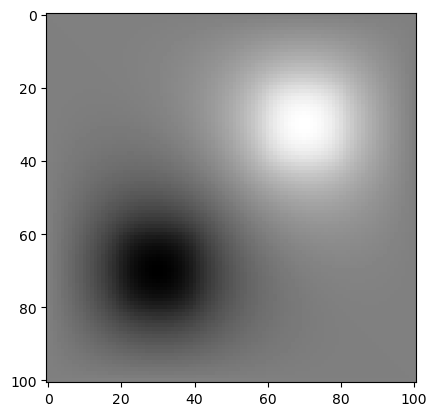

In [3]:
import numpy as np
import matplotlib.pyplot as plt

M = 100
target = 1e-6
epsilon0 = 1

phi = np.zeros([M+1,M+1], float)
phiprime = np.empty([M+1,M+1], float)
rho = np.zeros([M+1,M+1], float)

for i in range(60,81):
    for j in range(20,41):
        rho[i,j] = -1
for i in range(20,41):
    for j in range(60,81):
        rho[i,j] = 1

delta = 1
while delta>target:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = 0.25*(phi[i-1,j] + phi[i+1,j] + phi[i,j-1] + phi[i,j+1] + rho[i,j]/10000)
    delta = np.max(abs(phiprime-phi))
    phi,phiprime = phiprime,phi
    
plt.imshow(phi, 'gray')


Exercise 9.2

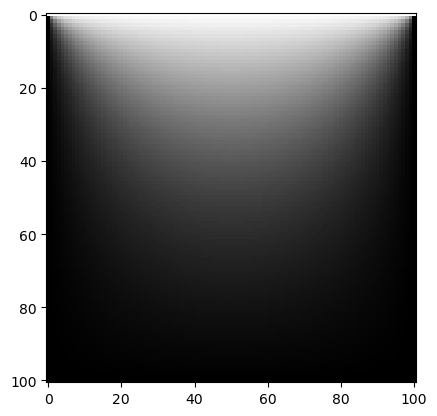

In [2]:
import numpy as np
import matplotlib.pyplot as plt

M = 100
target = 1e-6
V = 1
w = 0.9

phi = np.zeros([M+1,M+1], float)
phi[0,:] = V

delta = 1
while delta>target:
    delta = 0
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phi[i,j] = phi[i,j]
            else:
                delta_ij = 0.25*(phi[i-1,j] + phi[i+1,j] + phi[i,j-1] + phi[i,j+1]) - phi[i,j]
                phi[i,j] = phi[i,j] + (1+w)*(delta_ij)
                if abs(delta_ij) > delta:
                    delta = abs(delta_ij)
    
plt.imshow(phi, 'gray')


Exercise 9.3

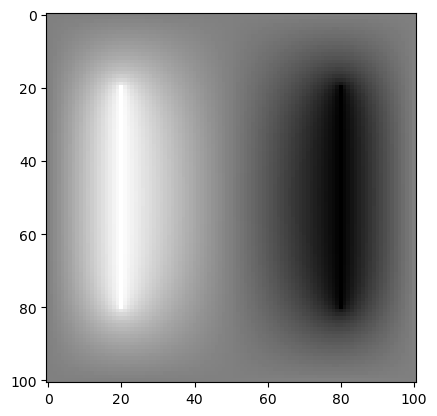

In [3]:
import numpy as np
import matplotlib.pyplot as plt

M = 100
target = 1e-6
V = 1
w = 0.9

phi = np.zeros([M+1,M+1], float)

for i in range(20,81):
    phi[i,20] = V
    phi[i,80] = -V

delta = 1
while delta>target:
    delta = 0
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phi[i,j] = phi[i,j]
            elif i>=20 and i<=80 and (j==20 or j==80):
                phi[i,j] = phi[i,j]
            else:
                delta_ij = 0.25*(phi[i-1,j] + phi[i+1,j] + phi[i,j-1] + phi[i,j+1]) - phi[i,j]
                phi[i,j] = phi[i,j] + (1+w)*(delta_ij)
                if abs(delta_ij) > delta:
                    delta = abs(delta_ij)
    
plt.imshow(phi, 'gray')


Exercise 9.4

<function matplotlib.pyplot.show(close=None, block=None)>

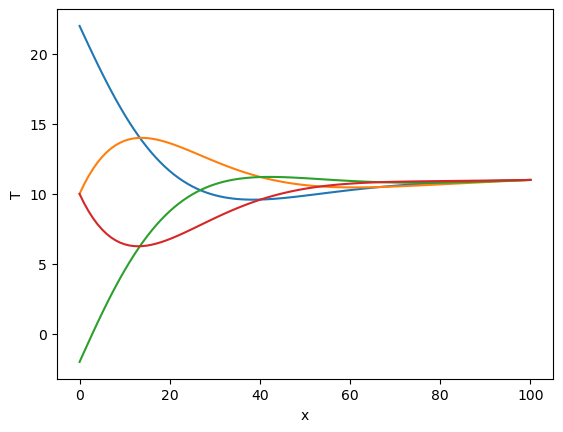

In [14]:
import numpy as np
import matplotlib.pyplot as plt

tao = 365*24*60*60
A = 10
B = 12
TS_i = 10
TD_i = 11
D = 0.1/(24*60*60)
L = 20
N = 100
a = L/N
h = 1*60*60
epsilon = h/1000

t1 = 9*365*24*60*60 + (365/4)*24*60*60
t2 = t1 + (365/4)*24*60*60
t3 = t2 + (365/4)*24*60*60
t4 = t3 + (365/4)*24*60*60
tend = t4 + epsilon

T = np.empty(N+1, float)
T[0] = TS_i
T[N] = TD_i
T[1:N] = 10
Tp = np.empty(N+1, float)
Tp[0] = TS_i
Tp[N] = TD_i

t = 0.0
c = h*D/(a*a)

while t<tend:
    Tp[0] = A + B*np.sin(2*np.pi*t/tao)
    Tp[1:N] = T[1:N] + c*(T[0:N-1] + T[2:N+1] - 2*T[1:N])
    T,Tp = Tp,T
    t += h
    
    if abs(t-t1)<epsilon:
        plt.plot(T)
    if abs(t-t2)<epsilon:
        plt.plot(T)
    if abs(t-t3)<epsilon:
        plt.plot(T)
    if abs(t-t4)<epsilon:
        plt.plot(T)
        
plt.xlabel("x")
plt.ylabel("T")
plt.show

Exercise 9.5; FTCS solution of the wave equation

<function matplotlib.pyplot.show(close=None, block=None)>

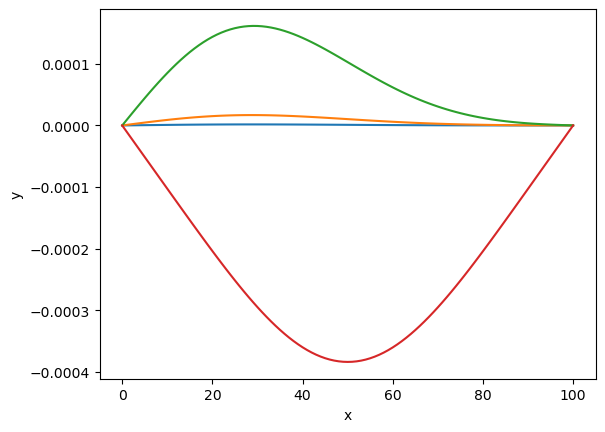

In [20]:
import numpy as np
import matplotlib.pyplot as plt

v = 100
L = 1
d = 0.1
C = 1
sigma = 0.3
h = 1e-6
N = 100
a = L/N
epsilon = h/1000

tend = 50e-3
t1 = 1e-5
t2 = 1e-4
t3 = 1e-3
t4 = 15e-3

T = np.empty(N+1, float)
T[:] = 0 
Tp = np.empty(N+1, float)
for i in range(N+1):
    Tp[i] = C*(a*i)*(L-a*i)*np.exp(-(a*i -d)**2/(2*sigma**2))/(L**2) 
T2 = np.empty(N+1,float)
T3 = np.empty(N+1,float)

t = 0.0
c = h*(v**2)/(a*a)

while t<tend:
    T2[1:N] = T[1:N] + h*Tp[1:N]
    T3[1:N] = Tp[1:N] + c*(T[0:N-1] + T[2:N+1] - 2*T[1:N])
    T2,T = T,T2
    Tp,T3 = T3,Tp
    t += h
    
    if abs(t-t1)<epsilon:
        plt.plot(T)
    if abs(t-t2)<epsilon:
        plt.plot(T)
    if abs(t-t3)<epsilon:
        plt.plot(T)
    if abs(t-t4)<epsilon:
        plt.plot(T)
        
plt.xlabel("x")
plt.ylabel("y")
plt.show

Exercise 9.6

The Laplacian in 3 dimensions is 
$$\nabla^2\phi=\frac{\phi(x+a,y,z)+\phi(x-a,y,z) + \phi(x,y+a,z)+\phi(x,y-a,z) + \phi(x,y,z+a)+\phi(x,y,z-a)-6\phi(x,y,x)}{a^2} $$

Exercise 9.7: The relaxation method for ordinary differential equations

We use equation 5.109 to get the approximation for the second derivatice of $x(t)$:
$$\frac{d^2x}{dt^2}=\frac{x(t+h) + x(t-h) - 2x(t)}{h^2}=-g.$$
Solving for $x(t)$:
$$x(t)=\frac{1}{2}(gh^2 + x(t+h) + x(t-h)).$$

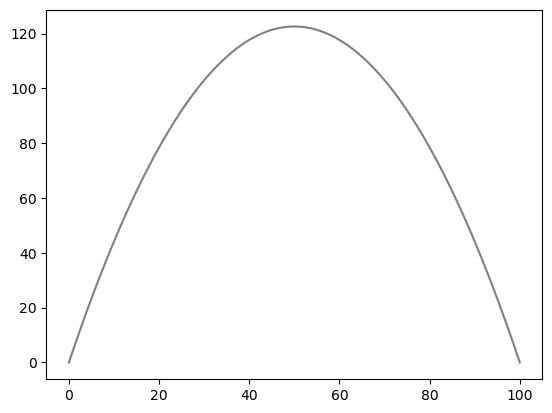

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
target = 1e-6
T = 10
h = T/N
g = 9.81

x = np.zeros(N+1, float)


t = 0
delta = 1
while delta>target:
    delta = 0
    for i in range(N+1):
        if i==0 or i==N:
            x[i] = 0
        else:
            delta_i = 0.5*(x[i+1] + x[i-1] + g*h**2) - x[i]
            x[i] += delta_i 
            if abs(delta_i) > delta:
                delta = abs(delta_i)

    
plt.plot(x, 'gray')

Exercise 9.8: The Schrödinger equation and the Crank-Nicolson method

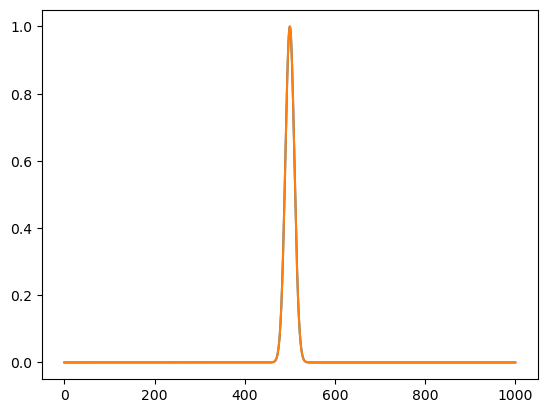

In [24]:
import numpy as np
import matplotlib.pyplot as plt

L = 1e-8
N = 1000
a = L/N
h = 1e-18
m = 9.109e-31
x0 = L/2
sigma = 1e-10
kappa = 5e10
hbar = 1.054571817e-34
a1 = 1 + 1j*h*hbar/(2*m*a**2)
a2 = -1j*h*hbar/(4*m*a**2)
b1 = 1 - 1j*h*hbar/(2*m*a**2)
b2 = 1j*h*hbar/(4*m*a**2)

psi = np.empty(N+1, complex)
psi[0] = 0
psi[N] = 0
for i in range(1,N):
    psi[i] = np.exp(-((i*a - x0)**2)/(2*sigma**2))*np.exp(1j*sigma*i*a)
    
A = np.zeros([N+1,N+1], complex)
B = np.zeros([N+1,N+1], complex)
A[0,0] = a1
B[0,0] = b1
for i in range(1,N+1):
    A[i,i] = a1
    B[i,i] = b1
    A[i-1,i] = a2
    A[i,i-1] = a2
    B[i-1,i] = b2
    B[i,i-1] = b2
    
v = B@psi

psi_t_plus_h = np.linalg.solve(A,v)

plt.plot(psi)
plt.plot(psi_t_plus_h)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

L = 1e-8
N = 1000
a = L/N
h = 1e-18
m = 9.109e-31
x0 = L/2
sigma = 1e-10
kappa = 5e10
hbar = 1.054571817e-34
a1 = 1 + 1j*h*hbar/(2*m*a**2)
a2 = -1j*h*hbar/(4*m*a**2)
b1 = 1 - 1j*h*hbar/(2*m*a**2)
b2 = 1j*h*hbar/(4*m*a**2)

psi = np.empty(N+1, complex)
psi[0] = 0
psi[N] = 0
for i in range(1,N):
    psi[i] = np.exp(-((i*a - x0)**2)/(2*sigma**2))*np.exp(1j*sigma*i*a)
    
A = np.zeros([N+1,N+1], complex)
B = np.zeros([N+1,N+1], complex)
A[0,0] = a1
B[0,0] = b1
for i in range(1,N+1):
    A[i,i] = a1
    B[i,i] = b1
    A[i-1,i] = a2
    A[i,i-1] = a2
    B[i-1,i] = b2
    B[i,i-1] = b2

t = 0
tend = 1e-16
while t<tend:
    v = B@psi
    psi = np.linalg.solve(A,v)
    t += h


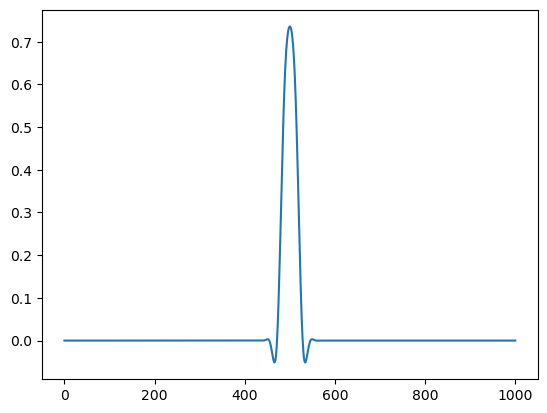

Exercise 9.9: Schrödinger equation and the spectral method

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from dcst import dst,idst

L = 1e-8
N = 1000
a = L/N
h = 1e-18
m = 9.109e-31
x0 = L/2
sigma = 1e-10
kappa = 5e10
hbar = 1.054571817e-34

psir = np.empty(N+1, float)
psii = np.empty(N+1, float)
psir[0] = 0
psii[N] = 0
psir[0] = 0
psii[N] = 0
for i in range(1,N):
    psir[i] = np.exp(-((i*a - x0)**2)/(2*sigma**2))*np.exp(1j*sigma*i*a).real
    psii[i] = np.exp(-((i*a - x0)**2)/(2*sigma**2))*np.exp(1j*sigma*i*a).imag
    
alpha = dst(psir)
eta = dst(psii)

def wavef(t):
    coeff = np.empty(N+1, float)
    for i in range(N+1):
        coeff[i] = alpha[i]*np.cos(t*np.pi**2*hbar*i**2/(2*m*L**2)) -eta[i]*np.sin(t*np.pi**2*hbar*i**2/(2*m*L**2))
    return idst(coeff)
        

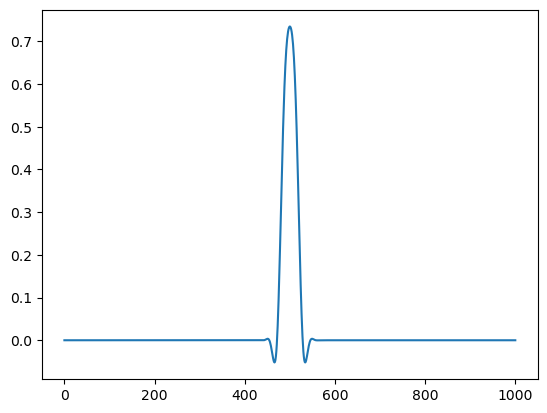

In [39]:
plt.plot(wavef(1e-16))

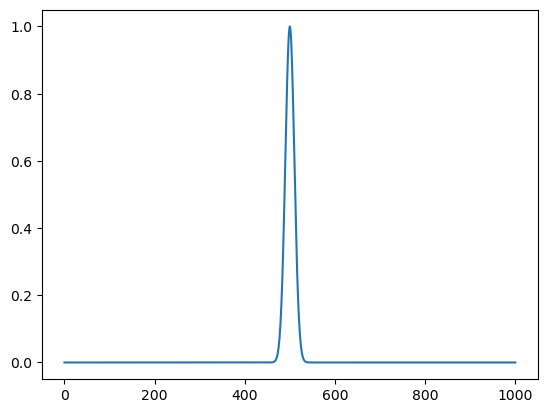

In [40]:
plt.plot(wavef(0))